## To which extent logistic regression can do?

### load and clean data

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams['font.family'] = 'DejaVu Sans Mono'

input_path_thyroid = '../../input/uci_thyroid'
tsh_transform = lambda x: np.log(1e-5 + x)
col_names = [
    'age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
    'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
    'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
    'psych', 'TSH_log', 'T3', 'TT4', 'T4U', 
    'FTI'
]
df_thyr = [
    pd.read_csv(
        f'{input_path_thyroid}/ann-{tag}.data', header=None, names=col_names+['class'],
        delim_whitespace=True
    )
    for tag in ['train', 'test']
]
df_thyr = pd.concat([
    pd.concat(df_thyr, axis=0, ignore_index=True), 
    pd.Series([0]*len(df_thyr[0]) + [1]*len(df_thyr[1]), name='test')
], axis=1)
df_thyr = df_thyr.drop_duplicates()
del df_thyr['hypopituitary']
df_thyr['TSH_log'] = tsh_transform(df_thyr['TSH_log'])

df_thyr_train, df_thyr_test = df_thyr[df_thyr['test'] == 0], df_thyr[df_thyr['test'] == 1]

X_train, y_train = df_thyr_train.iloc[:, :-2], df_thyr_train['class']
X_test,  y_test  =  df_thyr_test.iloc[:, :-2],  df_thyr_test['class']

## Naive trial

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report
)


In [36]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)
model.fit(X_train, y_train)
print(f'accuracy: {100*accuracy_score(y_train, model.predict(X_train)):.2f}%')
print(f'accuracy: {100*accuracy_score(y_test, model.predict(X_test)):.2f}%')

accuracy: 98.38%
accuracy: 97.40%


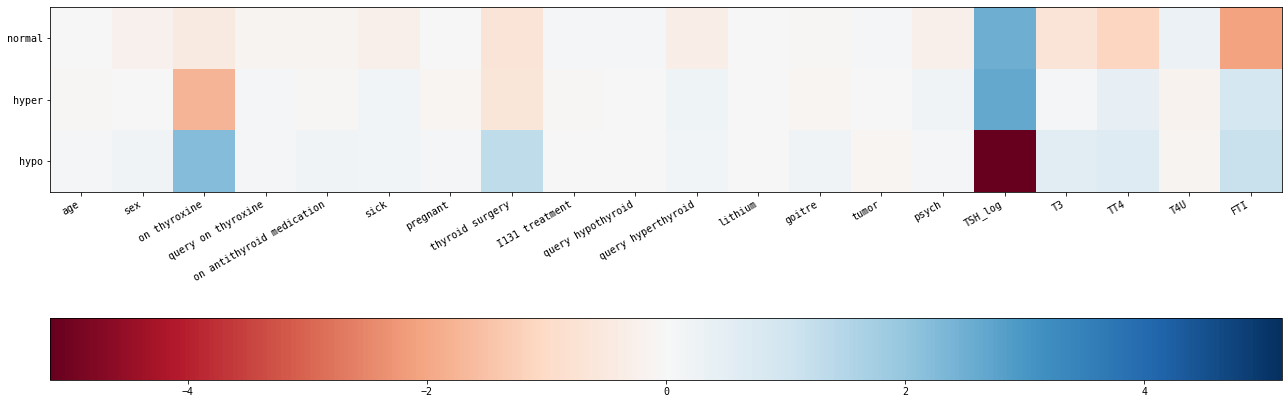

In [39]:
coef = model[-1].coef_
m = np.max(np.abs(coef))

fig, ax = plt.subplots(figsize=(18, 12))
img = plt.imshow(coef, vmin=-m, vmax=m, cmap='RdBu')
plt.colorbar(img, orientation='horizontal')
ax.set_xticks(np.arange(X_train.shape[1]))
ax.set_xticklabels(X_train.columns, ha='right', rotation=30)
ax.set_yticks(np.arange(3))
ax.set_yticklabels(['normal', 'hyper', 'hypo'])
plt.tight_layout(); plt.show(); plt.close()